In [9]:
import networkx as nx
# G = nx.Graph()
G = nx.DiGraph()  # Create a directed graph instead of an undirected one

G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("A", "D")


G.add_edge("C", "D")
G.add_edge("C", "E")
G.add_edge("C", "F")

G.add_edge("E", "G")

G.add_edge("G", "H")
G.add_edge("G", "I")

G.add_edge("F", "J")
G.add_edge("F", "K")

G.add_edge("B", "D", weight=2)
G.add_edge("A", "C", weight=3)
G.add_edge("C", "D")
nx.shortest_path(G, "A", "D", weight="weight")


['A', 'D']

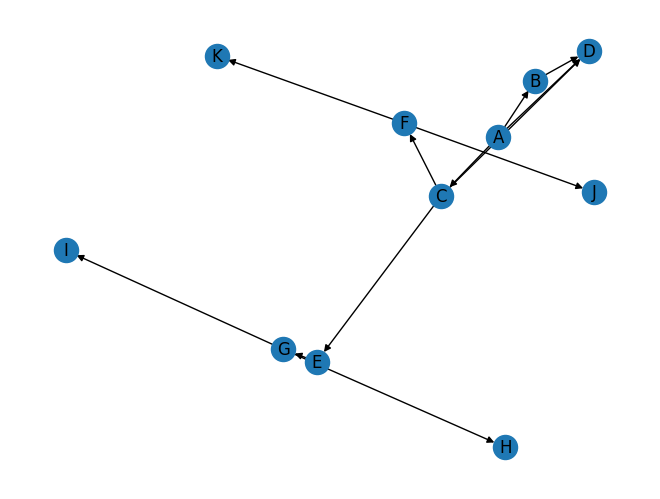

In [10]:
# show graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()